Longitutinal as from Lynden

In [262]:
import sympy
import matplotlib.pyplot as plt
import numpy as np
import einsteinpy

from sympy import symbols, sin, cos, sinh, ln, pi, sqrt
from sympy.utilities.lambdify import lambdify

from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor, RicciTensor, RicciScalar

sympy.init_printing()
print(einsteinpy.__version__)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)




0.4.0


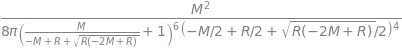

In [263]:
from sympy.abc import M, R, A
#lynden Bell 1985  Gravitational field energy density for spheres and black holes

# a is r_bar in the lynden Bell paper, bottom of page 23p 
a = (R - M + sqrt(R*(R - 2*M)))/2  

# E_d is The energy density relation in the lynden Bell paper, almost bottom of page 23p 
E_d = 1/(8*pi)*(M/((a**2)*((1 + M/(2*a)))**3))**2
E_d



#sympy.pprint(E_d)
#E_dR = E_d.subs(a, a)  
#E_dR = E_dR.simplify()

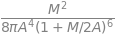

In [264]:
# E_dA is directly using isotropic coords 
E_dA = 1/(8*pi)*(M/((A**2)*((1 + M/(2*A)))**3))**2
E_dA

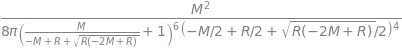

In [265]:
# E_dP is me PLAYING with the The energy density relation in the lynden Bell paper, almost bottom of page 23p 
E_dP = 1/(8*pi)*(M/((a**2)*((1 + M/(2*a)))**(3)))**2
E_dP


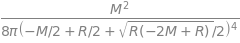

In [266]:
# E_d2 is the Lynden Bell - but approximated in the case of large r
E_d2 = M**2/(8*pi*a**4)
E_d2

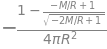

In [267]:
# E_d3 Brown York equation 6.18 divided by area of sphere
E_d3 = -1/(4*pi)*(1 - (1 - M/R)/sqrt((1 - 2*M/R)))/R**2
E_d3

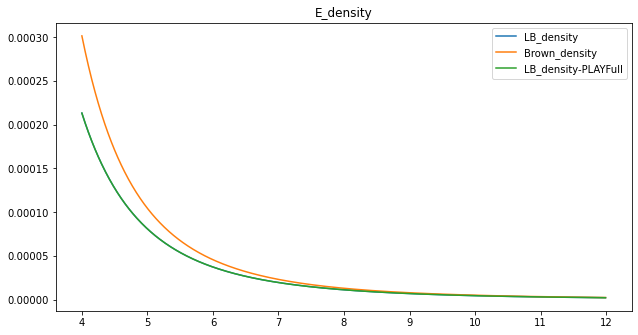

In [268]:
#wave front velocity as a function of r
# for a typical sine wave travelling along we have (v == velocity) 
#normalSin = sin(w*(syms[0] - syms[1]/v))
#so for us we have a wave front velocity - just mult by r/r and v
#normalSin = sin(w*(syms[0] - syms[1]/(syms[1]/ln(syms[1]*F)))
#M = 1
#Make x values - which we will sub in for r 
x = np.arange(4.0, 12, 0.01)
func = lambdify([R,M], E_d, "numpy")
func2 = lambdify([R,M], E_d2, "numpy")
func3 = lambdify([R,M], E_d3, "numpy")
func4 = lambdify([A,M], E_dA, "numpy")
func5 = lambdify([R,M], E_dP, "numpy")
m_val = 1.0
E_dVals = func(x, m_val)
E_d2Vals = func2(x, m_val)
E_d3Vals = func3(x, m_val)
E_d4Vals = func4(x, m_val)
E_d5Vals = func5(x, m_val)
#E_dVals = E_dR.evalf(subs={R: x})
# print(E_dVals)
# print(E_d2Vals)

fig=plt.figure(figsize=(8, 4))
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,E_dVals, label="LB_density")
#ax.plot(x,E_d2Vals, label="E2_density")
ax.plot(x,E_d3Vals, label="Brown_density")
#ax.plot(x,E_d4Vals, label="LB_Iso_density")
ax.plot(x,E_d5Vals, label="LB_density-PLAYFull")

ax.set_title("E_density")

ax.legend(loc="upper right")


# Energy density in York-Brown 1993 does not match the energy density in Lynden Bell as one approaches the BH

## Various Wolfram links

* York Brown Energy - derivative [wolfram ](https://www.wolframalpha.com/input?i=derivative+of+x%281+-+%281+-+2M%2Fx%29%5E%281%2F2%29%29).

* (2M - York Brown Energy) - Lynden-Bell pag 24p - constant  [wolfram ](https://www.wolframalpha.com/input?i=simplify+2M+-+x%281+-+%281+-+2M%2Fx%29%5E%281%2F2%29%29+%2B+M%5E2%2F%28x+-+M+%2B+%28x%28x+-+2M%29%29%5E%281%2F2%29%29).
    
    So the York Brown Energy and the Lynden Bell one are related it seems. 
    
    One measures energy inside a radius R, the other one outside a radius R, add them together, get a constant - the mass of the black hole.
    
    But if that is the case then why in the image do the energy densities not agree?


### 